In [1]:
import numpy as np
from helpers.plot import plot_waveform_and_specgram
from helpers.transform import TrimAfterClicker, standard_scale, min_max_scale

tac = TrimAfterClicker()
tac

44100


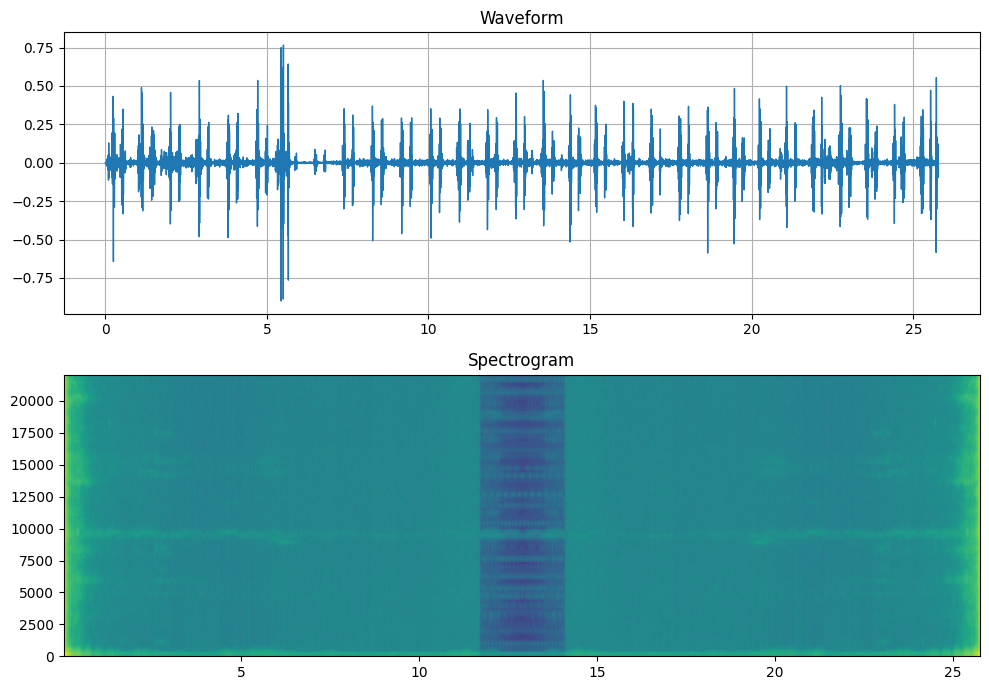

In [2]:
AUDIO_DIR = "data/mobile/test_clicker.mp4"
# AUDIO_DIR = "data/digital/test_clicker.wav"

audio, sample_rate = tac.load_audio(AUDIO_DIR)
print(sample_rate)
plot_waveform_and_specgram(audio, sample_rate)

This is how it should end:

44100


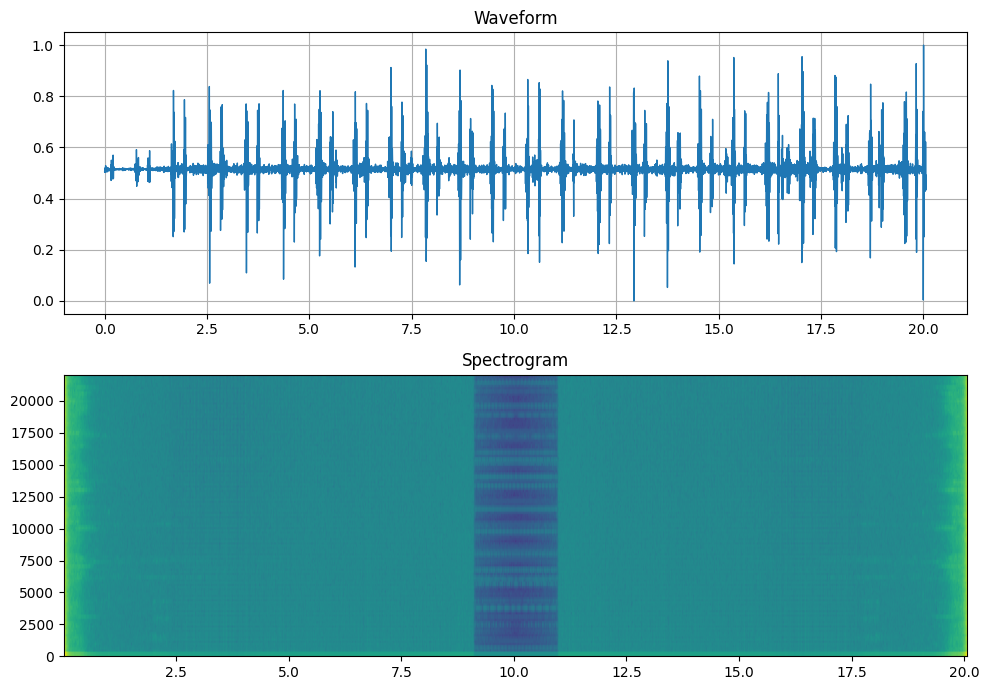

In [3]:
audio_result, sample_rate_result = tac.transform(AUDIO_DIR)
print(sample_rate_result)
plot_waveform_and_specgram(audio_result, sample_rate_result)

# Step by step

In [4]:
scaled_audio = tac.scale_audio(audio, standard_scale)
scaled_audio.mean(), scaled_audio.std()

(tensor(4.5626e-09), tensor(1.))

In [5]:
frequencies = tac.get_frequencies(scaled_audio, sample_rate)
magnitudes = tac.get_magnitudes(scaled_audio)

frequencies.shape, magnitudes.shape

(torch.Size([1136640]), torch.Size([1, 1136640]))

In [6]:
half_magnitudes, half_frequencies = tac.half_magnitudes_and_frequencies(
    magnitudes, frequencies
)

half_frequencies.shape, half_magnitudes.shape

(torch.Size([568320]), torch.Size([1, 568320]))

In [7]:
sorted_frequencies = tac.sort_frequencies(half_magnitudes, half_frequencies)

half_frequencies[:10], sorted_frequencies[:10]

(tensor([0.0000, 0.0388, 0.0776, 0.1164, 0.1552, 0.1940, 0.2328, 0.2716, 0.3104,
         0.3492]),
 tensor([[   46.7135,    43.1052,    47.9162,  ..., 13770.2305, 11800.6602,
           6534.8809]]))

In [8]:
cutoff = tac.get_frequency_percentile(scaled_audio, sample_rate, percentile_num=80)

cutoff, np.percentile(sorted_frequencies, 80)

(17639.96875, 17639.96875)

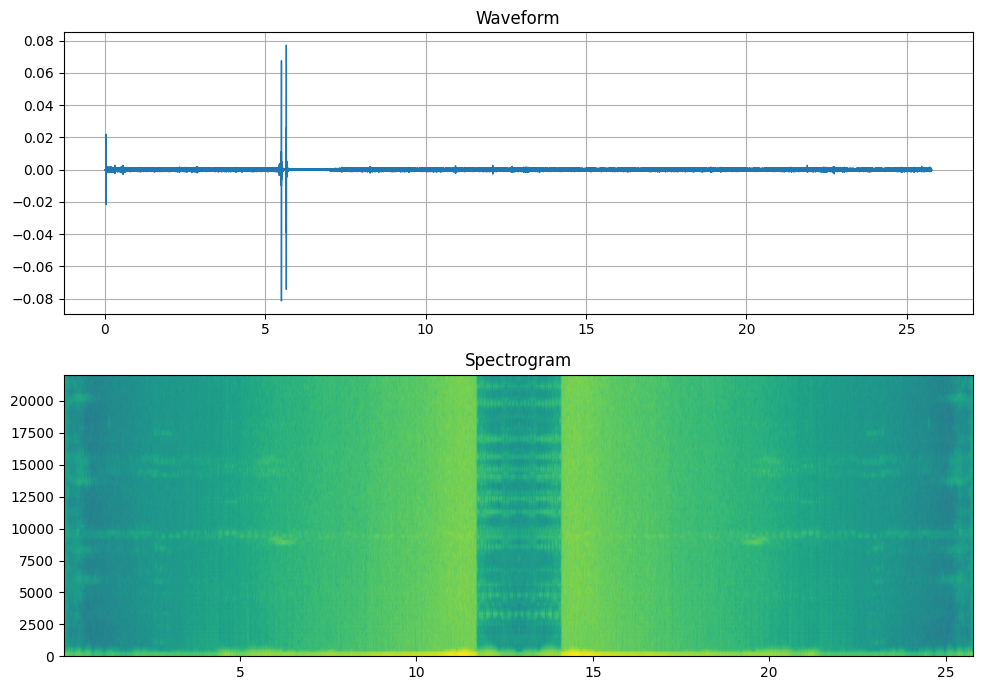

In [9]:
filtered_audio = tac.highpass_filter(scaled_audio, sample_rate, cutoff)
plot_waveform_and_specgram(filtered_audio, sample_rate)

In [10]:
peak_threshold = np.percentile(filtered_audio, 99.99)
peaks = tac.find_peaks(filtered_audio, peak_threshold)

peak_threshold, peaks

(0.005554236412420196,
 array([  1596,   1598,   1601,   1603,   1606,   1608, 242646, 242648,
        242659, 242661, 242663, 242677, 242679, 242681, 242684, 242686,
        242688, 242690, 242692, 242695, 242697, 242699, 242702, 242704,
        242706, 242708, 242711, 242713, 242715, 242718, 242720, 242722,
        242725, 242727, 242729, 242731, 242734, 242736, 242738, 242740,
        242743, 242745, 242748, 242750, 242752, 242754, 242756, 242759,
        242761, 242763, 242766, 242768, 242770, 242773, 242775, 242777,
        242782, 242784, 242786, 242789, 242791, 249408, 249410, 249417,
        249419, 249421, 249428, 249430, 249432, 249435, 249437, 249439,
        249442, 249444, 249446, 249449, 249451, 249453, 249456, 249458,
        249460, 249465, 249473, 249477, 249480, 249482, 249484, 249487,
        249489, 249491, 249494, 249496, 249498, 249501, 249503, 249505,
        249508, 249510, 249512, 249517, 249519, 249522, 249524, 249529,
        249531, 249536, 249538, 249541, 2

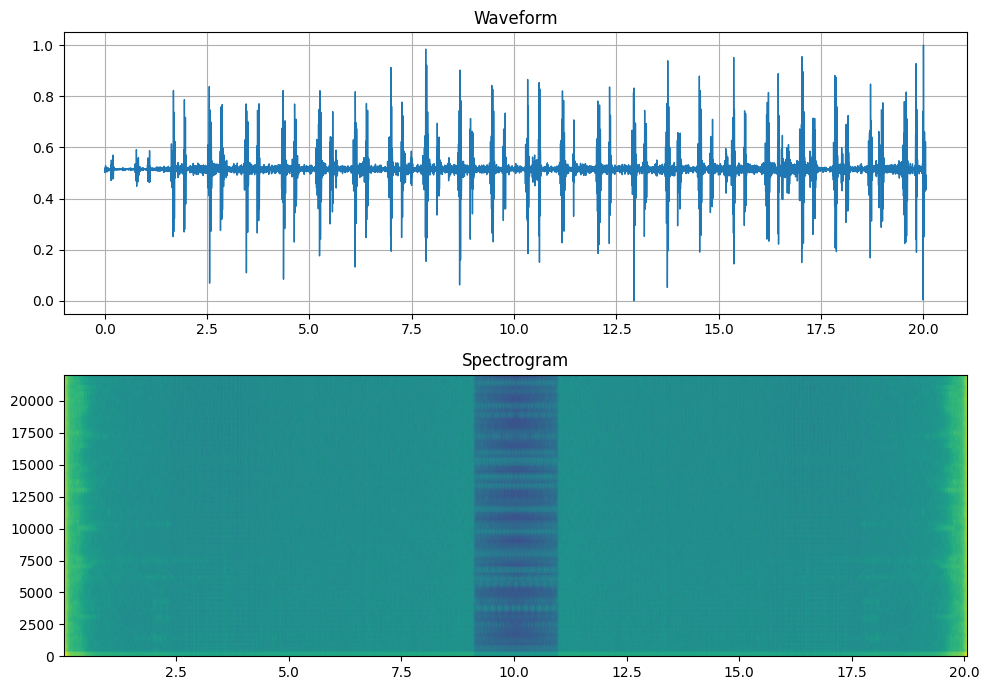

In [11]:
trimmed = tac.trim_audio(audio, sample_rate, peaks, n_peak=-1)
final_audio = min_max_scale(trimmed)

plot_waveform_and_specgram(final_audio, sample_rate)